# Introduction to Julia: packages


Ispra, 2017

Pablo Winant

# Julia Packages
The goal of this notebook is to quickly introduce Julia packages, useful to modelers.

## Packages

Huge ecosystem: http://pkg.julialang.org/pulse.html

Based on Git/Github:

- packages are repositories
- a package = module + files + scripts

Three types of packages:

- shipped (in [JuliaPro](http://juliacomputing.com/products/juliapro.html)) 
- registered (see [METADATA.jl](https://github.com/JuliaLang/METADATA.jl)): install with `Pkg.add()`
- unregistered: install with  `Pkg.clone()

Using a package:
- `using Dolo`: imports all the exported functions
- `import Dolo`: needs qualified access (`Dolo.time_iteration`)

## A small list of useful packages:

*nonlinear optimization / minimization*

- Roots
- Optim
- NLSolve (*)
- nlopt

*interpolation*

- Interpolations (*)
- BasisMatrices (*)
- splines.jl (**)

*Statistics* (updates on [JuliaStats](https://github.com/JuliaStats)

- DataFrames (~pandas)
- AxisArrays/DataArrays
- Distributions
- GLM
- MultivariateStats (*)

*Plotting libraries*

- Gadfly
- PyPlot
- Plots (*)
- Plotly / PlotlyJS (*)

*Formal calculation*

- Calculus
- SymEngine / Sympy
- Dolang
- ForwardDiff (*)

*Modeling*
- Dolang (**)
- Dolo (**)
- Dyno (**)

See [ucidatascienceinitiative](http://ucidatascienceinitiative.github.io/IntroToJulia/) for a more data-oriented introduction.

## Juno

Atom-based Julia IDE

- atom features: 

    - command palette (ctrl+shift+p), multiple cursors, plugins
    
- juno features:

    - enable workspace (default layout)
    - julia console (command line integration)
    - progressbar
    - debugger

### Exercise 1: basic package management

- list all installed packages
- find directory of installed packages
- inspect content of package QuantEcon
- install (or clone) Dolo.jl

## Topic: statistics

- Arrays and DataFrames:
    - past and present: DataFrames
    - future:???
        - database oriented: DataTables ( [JuliaData](https://github.com/JuliaData) )
        - labelled arrays: AxisArrays or NamedArrays (see [JuliaArrays](https://github.com/JuliaArrays?type=)
- Satistics (see [JuliaStats](https://github.com/JuliaStats) )
    - Distributions.jl
    - StatsBase.jl
    - RDatasets.jl
    
- Econometrics
    - TimeSeries.jl
    - GLM.jl
    - Multivariate.jl

### Exercise 2: a (tiny) bit of statistics

- Create a simple random DataFrame with the following columns (N=100 observations):

    - x and y random, z = 0.5*x + 0.5 y
    - $x$ and $y$ correlated (use Distributions.jl)

- Compute descriptive statistics

(for those who have a good connection):

- Load the LifeCycleSavings database from RData using RDatasets.jl.
    
    - use GLM.jl to regress SR on Pop15, Pop75, DPI, DDPI using OLS

#### Solution


In [11]:
import DataFrames
N = 100
col1 = rand(N)
col2 = rand(N);
df = DataFrames.DataFrame(x=col1, y=col2);
df[:z] = df[:x] + df[:y];

In [12]:
# Base.rand does not do multivariate laws.
import Distributions
Sigma = [0.9 0.1; 0.1 0.85]
mu = [0.0, 0.0]
mvn = Distributions.MvNormal(mu, Sigma)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [0.9 0.1; 0.1 0.85]
)


In [ ]:
DataFrames.readtable() # read from text
# if text too big:
# - use pandas from julia
# - write yourself file reader

In [ ]:
Excel:
# pandas
# ExcelReaders.jl (python xlrd)
# Taro.jl ?

2d plots with PyPlot

In [78]:
typeof(mvn)

Distributions.MvNormal{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}}

In [79]:
methods(Distributions.rand)

# 165 methods for generic function "rand":
rand(::Type{ColorTypes.Gray24}) in ColorTypes at /home/pablo/.julia/v0.6/ColorTypes/src/operations.jl:61
rand(::Type{ColorTypes.Gray24}, sz::Tuple{Vararg{Int64,N}} where N) in ColorTypes at /home/pablo/.julia/v0.6/ColorTypes/src/operations.jl:62
rand(::Type{ColorTypes.AGray32}) in ColorTypes at /home/pablo/.julia/v0.6/ColorTypes/src/operations.jl:63
rand(::Type{ColorTypes.AGray32}, sz::Tuple{Vararg{Int64,N}} where N) in ColorTypes at /home/pablo/.julia/v0.6/ColorTypes/src/operations.jl:64
rand(rd::RandomDevice, ::Type{T}) where T<:Union{Bool, Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base.Random at random.jl:53
rand(rng::RandomDevice, ::Type{Base.Random.Close1Open2}) in Base.Random at random.jl:66
rand(rng::RandomDevice, ::Type{Base.Random.CloseOpen}) in Base.Random at random.jl:69
rand(r::MersenneTwister, ::Type{I}) where I<:Base.Random.FloatInterval in Base.Random at random.jl:138
rand(r::MersenneTwister, ::Type{T}) where T<:Union{Bool, Int16, Int32, Int8, UInt16, UInt32, UInt8} in Base.Random at random.jl:324
rand(r::MersenneTwister, ::Type{UInt64}) in Base.Random at random.jl:327
rand(r::MersenneTwister, ::Type{UInt128}) in Base.Random at random.jl:332
rand(r::MersenneTwister, ::Type{Int64}) in Base.Random at random.jl:338
rand(r::MersenneTwister, ::Type{Int128}) in Base.Random at random.jl:339
rand(rng::MbedTLS.CtrDrbg, size::Integer) in MbedTLS at /home/pablo/.julia/v0.6/MbedTLS/src/ctr_drbg.jl:47
rand(s::StatsBase.RandIntSampler) in StatsBase at /home/pablo/.julia/v0.6/StatsBase/src/rand.jl:19
rand(d::Distributions.DiscreteUniform) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/univariate/discrete/discreteuniform.jl:131
rand(d::Distributions.Hypergeometric) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/univariate/discrete/hypergeometric.jl:72
rand(d::Distributions.Kolmogorov) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/univariate/continuous/kolmogorov.jl:101
rand(d::Distributions.EmpiricalUnivariateDistribution) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/empirical.jl:67
rand(s::Distributions.CategoricalDirectSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/categorical.jl:14
rand(s::Distributions.AliasTable) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/categorical.jl:44
rand(s::Distributions.BinomialRmathSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/binomial.jl:7
rand(s::Distributions.BinomialGeomSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/binomial.jl:56
rand(s::Distributions.BinomialTPESampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/binomial.jl:141
rand(s::Distributions.BinomialAliasSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/binomial.jl:247
rand(s::Distributions.BinomialPolySampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/binomial.jl:276
rand(s::Distributions.PoissBinAliasSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/poissonbinomial.jl:21
rand(s::Distributions.PoissonRmathSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/poisson.jl:6
rand(s::Distributions.PoissonCountSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/poisson.jl:28
rand(s::Distributions.PoissonADSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/poisson.jl:58
rand(s::Distributions.ExponentialSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/exponential.jl:5
rand(s::Distributions.ExponentialLogUSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/exponential.jl:12
rand(s::Distributions.GammaRmathSampler) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/samplers/gamma.jl:6
rand(s::Distributions.GammaG

In [80]:
M = Distributions.rand(mvn, N)

2×100 Array{Float64,2}:
 1.11152    2.51363   0.544414  0.0840355  …  0.165553  -0.211888   0.767247
 0.615823  -0.221542  0.416668  0.69762       0.60842    0.543702  -0.343747

In [81]:
df2 = DataFrames.DataFrame(x=M[1,:], y=M[2,:]);
df2[:z] = df2[:x] + df2[:y];

In [82]:
# now descriptive statistics

In [83]:
std(df[:x])

0.306086098791459

In [84]:
cor(df) # doesn't work

LoadError: [91mMethodError: no method matching cor(::DataFrames.DataFrame)[0m
Closest candidates are:
  cor([91m::DataArrays.DataArray{T,1} where T[39m, [91m::DataArrays.DataArray{T,1} where T[39m) at /home/pablo/.julia/v0.6/DataArrays/src/operators.jl:676
  cor([91m::AbstractArray{T,1} where T[39m) at statistics.jl:497
  cor([91m::AbstractArray{T,2} where T[39m, [91m::Int64[39m) at statistics.jl:505
  ...[39m

In [85]:
# let's see what cor is defined for
methods(cor)

# 12 methods for generic function "cor":
cor(dv1::DataArrays.DataArray{T,1} where T, dv2::DataArrays.DataArray{T,1} where T) in DataArrays at /home/pablo/.julia/v0.6/DataArrays/src/operators.jl:676
cor(x::AbstractArray{T,1} where T) in Base at statistics.jl:497
cor(X::AbstractArray{T,2} where T, vardim::Int64) in Base at statistics.jl:505
cor(x::DenseArray{T,2} where T, w::StatsBase.AbstractWeights) in StatsBase at /home/pablo/.julia/v0.6/StatsBase/src/cov.jl:111
cor(x::DenseArray{T,2} where T, w::StatsBase.AbstractWeights, vardim::Int64) in StatsBase at /home/pablo/.julia/v0.6/StatsBase/src/cov.jl:111
cor(X::AbstractArray{T,2} where T) in Base at statistics.jl:507
cor(x::AbstractArray{T,1} where T, y::AbstractArray{T,1} where T) in Base at statistics.jl:514
cor(x::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T, y::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T, vardim::Int64) in Base at statistics.jl:522
cor(x::AbstractArray{T,1} where T, Y::AbstractArray{T,2} where T) in Base at statistics.jl:525
cor(X::AbstractArray{T,2} where T, y::AbstractArray{T,1} where T) in Base at statistics.jl:526
cor(X::AbstractArray{T,2} where T, Y::AbstractArray{T,2} where T) in Base at statistics.jl:527
cor(d::Distributions.Distribution{Distributions.Multivariate,S} where S<:Distributions.ValueSupport) in Distributions at /home/pablo/.julia/v0.6/Distributions/src/multivariates.jl:40

In [86]:
# OK so we need to pass an array: Array(x) converts x to an array
cor(Array(df2))

3×3 Array{Float64,2}:
  1.0        -0.0529814  0.735226
 -0.0529814   1.0        0.637916
  0.735226    0.637916   1.0     

Economists experiences with R should try RDatasets, GLM

In [87]:
import RDatasets
LifeCycleSavings = RDatasets.dataset("datasets", "LifeCycleSavings")

,Country,SR,Pop15,Pop75,DPI,DDPI
1,Australia,11.43,29.35,2.87,2329.68,2.87
2,Austria,12.07,23.32,4.41,1507.99,3.93
3,Belgium,13.17,23.8,4.43,2108.47,3.82
4,Bolivia,5.75,41.89,1.67,189.13,0.22
5,Brazil,12.88,42.19,0.83,728.47,4.56
6,Canada,8.79,31.72,2.85,2982.88,2.43
7,Chile,0.6,39.74,1.34,662.86,2.67
8,China,11.9,44.75,0.67,289.52,6.51
9,Colombia,4.98,46.64,1.06,276.65,3.08
10,Costa Rica,10.78,47.64,1.14,471.24,2.8


Library GLM uses a syntax close to R's lm for regressions.

In [90]:
using GLM
fm2 = fit(LinearModel, SR ~ Pop15 + Pop75 + DPI + DDPI, LifeCycleSavings)

LoadError: [91mUndefVarError: SR not defined[39m

In [91]:
fm2

LoadError: [91mUndefVarError: fm2 not defined[39m

## Topic: Plotting


- PyPlot
    - (transparent wrapper to Python's Matplotlib)
    - very mature, publication-grade quality, even better with 2.0
    - matlab-like interface
- Gadfly
    - native Julia
    - grammar of graphics approach
- Plotly/PlotlyJS
    - very complete API
    - produces interactive Javascript
- Plots
    - simple to use higher level api

### Exercise 3: plotting

Using PyPlot and/or Gadfly:

- plot $f: x\rightarrow \frac{sin(\epsilon + \frac{a |x|}{\pi})}{\epsilon + \frac{a |x|}{\pi}}$ for different values of a on the same graph (with labels, titles, ...)
- plot a contour plot for $g: x, y\rightarrow \frac{sin(\frac{\sqrt{x^2+y^2}}{\pi})}{\frac{\sqrt{x^2+y^2}}{\pi}}$

- (optional): use Plotly or Plots
- (optional 2):  make a 3d graph for $g(x,y)$ using Plotly

#### Solution

In [3]:
epsilon = 0.01
f(x, a) = sin(epsilon + a*sqrt(x^2))/(epsilon + a*sqrt(x^2))
g(x) = sin(epsilon + sqrt(x[1]^2+x[2]^2))/(epsilon + sqrt(x[1]^2+x[2]^2))

g (generic function with 1 method)

In [4]:
xvec = collect(linspace(0,2,1000))
xvec_ = (linspace(0,2,1000))
yvec = f.(xvec_, 1.0);

Let's use Gadfly

INFO: Recompiling stale cache file /home/pablo/.julia/lib/v0.6/AxisAlgorithms.ji for module AxisAlgorithms.
INFO: Recompiling stale cache file /home/pablo/.julia/lib/v0.6/Gadfly.ji for module Gadfly.
  likely near /home/pablo/.julia/v0.6/KernelDensity/src/univariate.jl:80


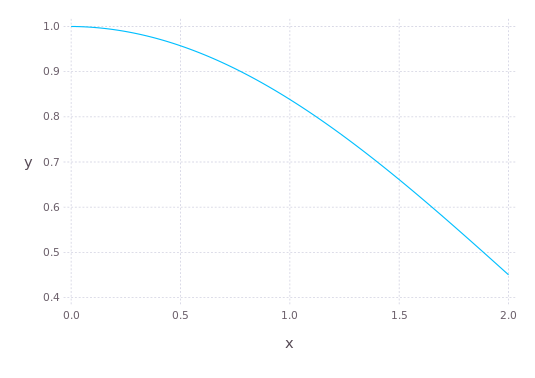

In [5]:
using Gadfly
plot(x=xvec, y=yvec, Geom.line)

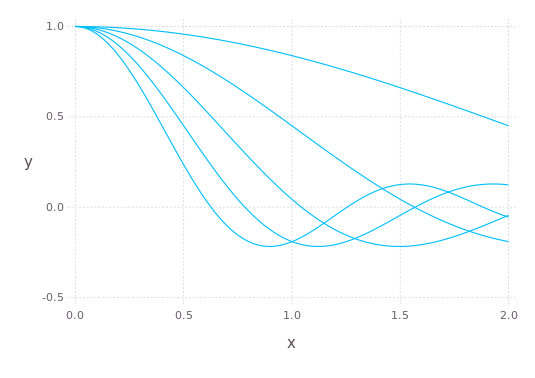

In [6]:
# what if we want to plot many graphs ?
xvec = collect(linspace(0,2,1000))
yvecs = [f.(xvec, a) for a=[1,2,3,4,5]]
layers = [layer(x=xvec, y=yvecs[i], Geom.line) for i=1:length(yvecs)]
plot(layers...)

In [6]:
import DataFramesmes

In [7]:
# but it's easier to construct a dataframe first:
data = vcat(
    DataFrames.DataFrame(x=xvec,y=f.(xvec, 1.0), label="a=1"),
    DataFrames.DataFrame(x=xvec,y=f.(xvec, 2.0), label="a=2"),
    DataFrames.DataFrame(x=xvec,y=f.(xvec, 3.0), label="a=3")
);


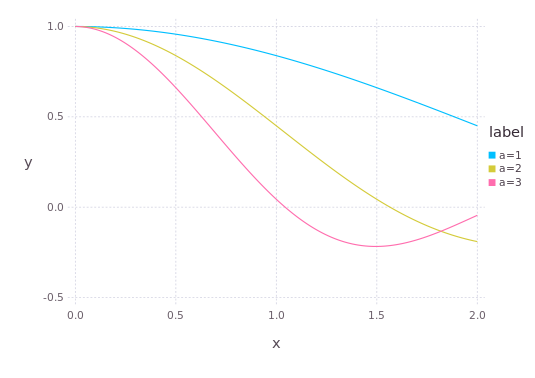

In [8]:
plot(data, x="x", y="y", color=:label, Geom.line)

We can do the same with PyPlot which is a wrapper to the <del>easier</del> more matlabesque library Matplotlib.

In [9]:
import PyPlot
const plt = PyPlot

INFO: Recompiling stale cache file /home/pablo/.julia/lib/v0.6/BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file /home/pablo/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


PyPlot

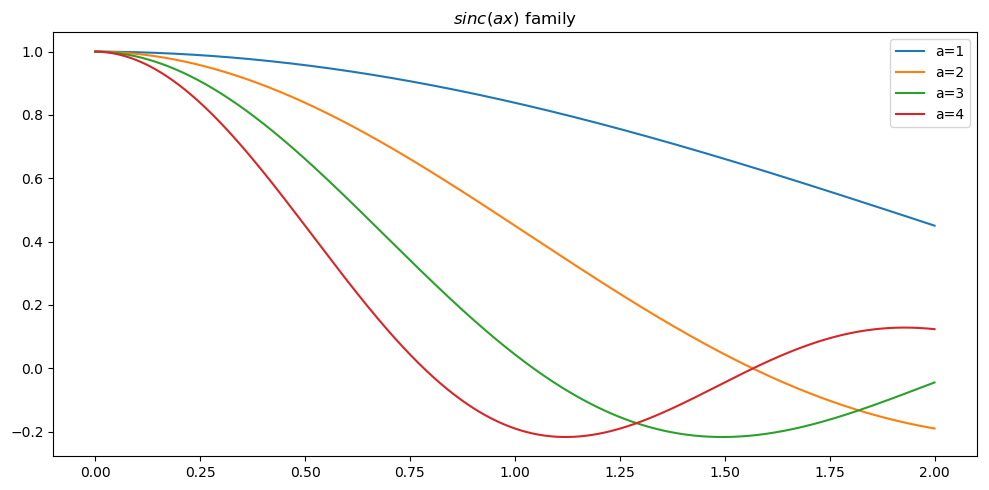

In [12]:
yvecs = [f.(xvec, a) for a=[1,2,3,4,5]]
fig = plt.figure(figsize=(10,5))
plt.plot(xvec, yvecs[1], label="a=1")
plt.plot(xvec, yvecs[2], label="a=2")
plt.plot(xvec, yvecs[3], label="a=3")
plt.plot(xvec, yvecs[4], label="a=4")
plt.legend()
s = "\$ \sinc(a x) \$ family"
plt.title(s)
plt.tight_layout()
plt.savefig("output.png")

2d plots with PyPlot

In [13]:
M = 10
n = 100
fine_grid = vcat( [ [x y] for x = linspace(-M,M,n), y = linspace(-M,M,n) ]... );
xm = reshape(fine_grid[:,1], n,n)
ym = reshape(fine_grid[:,2], n,n);


In [14]:
vals = [g(fine_grid[i,:]) for i=1:size(fine_grid,1)]
V = reshape(vals, size(xm)...)

100×100 Array{Float64,2}:
  0.0706528     0.0708013    0.0695315   …   0.0708013    0.0706528  
  0.0708013     0.0694898    0.0667418       0.0694898    0.0708013  
  0.0695315     0.0667418    0.0625257       0.0667418    0.0695315  
  0.0668856     0.0626285    0.0569845       0.0626285    0.0668856  
  0.0629331     0.0572483    0.050245        0.0572483    0.0629331  
  0.0577687     0.0507231    0.0424561   …   0.0507231    0.0577687  
  0.0515081     0.0431942    0.0337837       0.0431942    0.0515081  
  0.0442849     0.0348185    0.0244066       0.0348185    0.0442849  
  0.0362466     0.025764     0.014511        0.025764     0.0362466  
  0.02755       0.016205     0.00428653      0.016205     0.02755    
  0.0183579     0.00631832  -0.00607894  …   0.00631832   0.0183579  
  0.00883453   -0.00372117  -0.0164031      -0.00372117   0.00883453 
 -0.000857742  -0.0137443   -0.0265131      -0.0137443   -0.000857742
  ⋮                                      ⋱                      

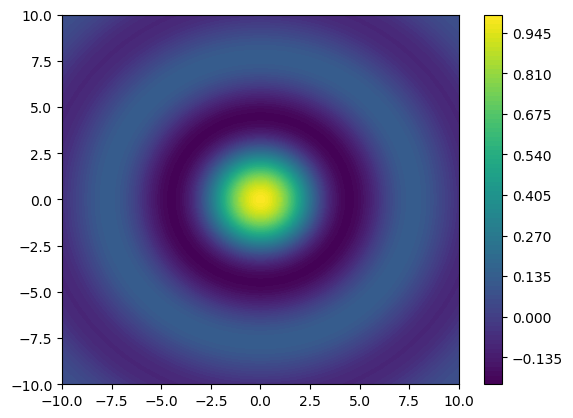

PyObject <matplotlib.colorbar.Colorbar object at 0x7f6841565ba8>

In [15]:
plt.contourf(xm,ym,V,100)
plt.colorbar()

In [16]:
using Plots

INFO: Recompiling stale cache file /home/pablo/.julia/lib/v0.6/Plots.ji for module Plots.



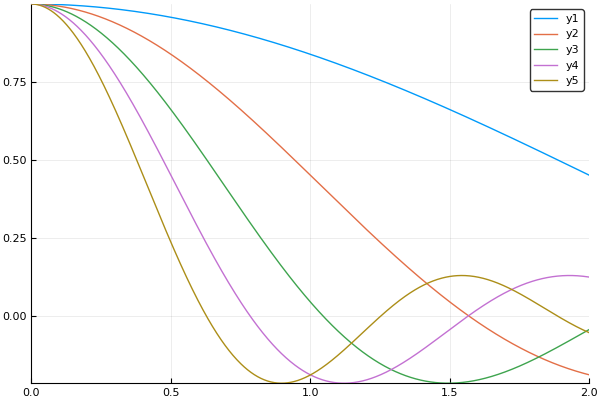

In [17]:
Plots.plot(xvec, yvecs)

## Topic: Maximization/optimization

Two big organizations:

- JuliaOpt: many wrappers, being streamlined towards mathematical programming
- JuliaNLsolve:
    - Optim: maximization
    - NLSolve: nonlinear solution
- MathJulia:
    - Roots: simple api for 1d functions

Remark: the need to jit-compile repeated optimization call partly explains the non-intuitive interfaces.

### Exercise 3: maximization with Optim.jl

- Use Optim to find the maximum of g, with initial point $x_0=[0.1, 0.1]$
- Use Optim to find the maximum of g, with initial point $x_0=[1.1, 5.1]$

#### Solution

In [18]:
import Optim

In [19]:
sol = Optim.optimize(g, [1.1,5.1])

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [1.1,5.1]
 * Minimizer: [1.5515434309840208,4.2064412266016]
 * Minimum: -2.172336e-01
 * Iterations: 21
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 42

In [23]:
sol.minimizer

2-element Array{Float64,1}:
 1.55154
 4.20644

In [21]:
sol.f_converged

false

In [22]:
Optim.converged(sol)

true

In [26]:
Optim.SimulatedAnnealing()

Optim.SimulatedAnnealing{Optim.#default_neighbor!,Optim.#log_temperature}(Optim.default_neighbor!, Optim.log_temperature, true)

In [28]:
sol0 = Optim.optimize(g, [1.1,5.1], Optim.SimulatedAnnealing())
sol = Optim.optimize(g, sol0.minimizer)

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [-1.0899599914374498,4.346883660470722]
 * Minimizer: [-1.2277182968208127,4.311848467786408]
 * Minimum: -2.172336e-01
 * Iterations: 15
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 34

### Exercise 4: solving a nonlinear function with Rootls.jl and NLsolve.jl

1. First, we would like to find the smallest root $x_0$ such that $f(x_0)=0$ using Roots.jl
  - find the root $x_0$
  - start from different initial points

2. Now we look for some values $(x_0,y_0)$ such that $g(x_0, y_0)=0$ and $y_0=x_0^2$
  - Define the function which computes the residuals
  - Find a (many solutions) using NLsolve

#### Solution

Let's solve a 1-dimensional function using Roots.

In [29]:
import Roots

INFO: Recompiling stale cache file /home/pablo/.julia/lib/v0.6/Roots.ji for module Roots.


In [30]:
Roots.fzero(x->f(x,1.0), 1.0)

3.1315926535897933

In [31]:
xvec = linspace(-10, 10, 100)
zeros = [Roots.fzero(x->f(x,1.0),u0) for u0 in xvec];

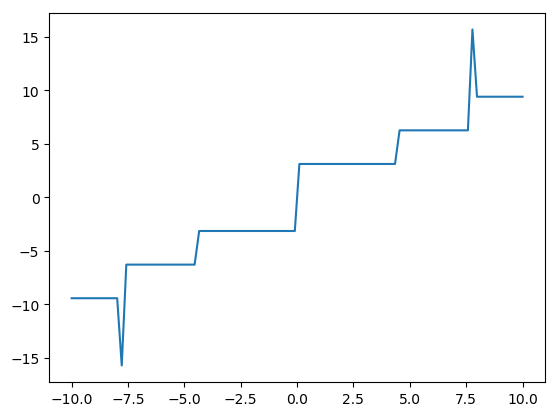

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6841294908>

In [32]:
plt.plot(xvec, zeros)

Now let's solve $g$ using a nonlinear solver.

In [2]:
import NLsolve


In [3]:
function residual!(z, res)
    epsilon = 0.0001
    res = zeros(2)
    x = z[1]
    y = z[2]
    res[1] = sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))
    res[2] = (y - x^2)
#     return res
end



residual! (generic function with 1 method)

In [4]:
function residual(z::Vector{Float64})
    epsilon = 0.0001
    res = zeros(2)
    x = z[1]
    y = z[2]
    res[1] = sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))
    res[2] = (y - x^2)
    return res
end

residual (generic function with 1 method)

In [5]:
 residual([0.5, 0.0])

2-element Array{Float64,1}:
  0.958835
 -0.25    

In [9]:
@time sol = NLsolve.nlsolve(residual!, [0.5, 0.0])

  0.000128 seconds (65 allocations: 8.156 KiB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5, 0.0]
 * Zero: [0.5, 0.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 0
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 1
 * Jacobian Calls (df/dx): 1

In [8]:
@time sol = NLsolve.nlsolve(NLsolve.not_in_place(residual), [0.5, 0.0])

  0.000159 seconds (251 allocations: 21.297 KiB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5, 0.0]
 * Zero: [1.63739, 2.68103]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

## Topic: Manipulating equations / models


- Differentiating equations:

  - calculus.jl
  - symengine.jl (faster, c++ dependencies)
  
- Automatic differentiation (see [JuliaDiff](https://github.com/JuliaDiff):
  
  - forwardiff.jl

- Dynamic/economic equations

  - dolang
      - equations with timing
      - metaprogramming
      - syntactic checks for model files

### Calculus.jl

We can also use Calculus.jl to perform symbolic differentiation.

In [16]:
expr = :(a + 6/d)



:(a + 6 / d)

In [17]:
dump(expr)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Symbol a
    3: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol /
        2: Int64 6
        3: Symbol d
      typ: Any
  typ: Any


In [19]:
expr.args[3].args[3] = :c

:c

In [20]:
expr

:(a + 6 / c)

In [22]:
a = 3
c = 2

2

In [23]:
eval(expr)

6.0

In [11]:
import Calculus
Calculus.differentiate("sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))", [:x,:y])

2-element Array{Any,1}:
 :(((((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)
 :(((((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)

In [24]:
function residual!(z, res)
    epsilon = 0.0001
    x = z[1]
    y = z[2]
    res[1] = sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))
    res[2] = (y - x^2)
    return res
end
# we copy/paste:
function jacobian!(z, res)
    epsilon = 0.0001
#     res = zeros(2,2)
    x = z[1]
    y = z[2]
    res[1,1] = (((((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)
    res[1,2] = (((((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)
    res[2,1] = -2.0*x
    res[2,2] = 1.0
end

jacobian! (generic function with 1 method)

In [25]:
import NLsolve

In [26]:
sol = NLsolve.nlsolve( NLsolve.DifferentiableMultivariateFunction(residual!, jacobian!), [+0.5, 0.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5, 0.0]
 * Zero: [1.63739, 2.68103]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [ ]:
###

### SymEngine / Sympy

### Dolang.jl

Functions can also be created/differentiated with [Dolang.jl](https://github.com/EconForge/Dolang)

In [27]:
import Dolang
using Dolang
import Base

INFO: Recompiling stale cache file /home/pablo/.julia/lib/v0.6/Dolang.ji for module Dolang.


In [31]:
expr = parse("sin(epsilon + sqrt(x(1)^2+y(1)^2))/(epsilon + sqrt(x(0)^2+y(0)^2))")
expr2 = parse("y(0)-x(0)^2")

latex_string = string("\$", Dolang.latex(expr), "\$")
Base.HTML(latex_string)

HTML{String}("\$\\frac{\\text{sin}\\left(\\epsilon+\\text{sqrt}\\left(\\left(x_{t+1}\\right)^{2}+\\left(y_{t+1}\\right)^{2}\\right)\\right)}{\\epsilon+\\text{sqrt}\\left(\\left(x_{t}\\right)^{2}+\\left(y_{t}\\right)^{2}\\right)}\$")

In [37]:
ff = Dolang.FunctionFactory([expr, expr2] ,[(:x,1),(:y,1),(:x,0),(:y,0)], [:epsilon]; funname=:gg)
code = Dolang.make_function(ff)
# gg, gg! = eval(code)

quote 
    @generated function gg{D}(::Dolang.TDer{D}, V::AbstractVector, p)
            ff = Dolang.FunctionFactory{Array{Tuple{Symbol,Int64},1},Array{Symbol,1},Dict{Symbol,Any},DataType}(Expr[:(sin(_epsilon_ + sqrt(_x__1_ ^ 2 + _y__1_ ^ 2)) / (_epsilon_ + sqrt(_x__0_ ^ 2 + _y__0_ ^ 2))), :(_y__0_ - _x__0_ ^ 2)], Tuple{Symbol,Int64}[(:x, 1), (:y, 1), (:x, 0), (:y, 0)], Symbol[:epsilon], Symbol[], Dict{Symbol,Any}(), :gg, Dolang.SkipArg, Dolang.IncidenceTable(Dict(2=>Dict(:y=>Set([0]),:x=>Set([0])),1=>Dict(:y=>Set([0, 1]),:x=>Set([0, 1]))), Dict(:y=>Set([0, 1]),:x=>Set([0, 1])), Dict(0=>Set(Symbol[:y, :x]),1=>Set(Symbol[:y, :x]))))
            Dolang.func_body(ff, Der{D})
        end
    @generated function gg!{D}(::Dolang.TDer{D}, out, V::AbstractVector, p)
            ff = Dolang.FunctionFactory{Array{Tuple{Symbol,Int64},1},Array{Symbol,1},Dict{Symbol,Any},DataType}(Expr[:(sin(_epsilon_ + sqrt(_x__1_ ^ 2 + _y__1_ ^ 2)) / (_epsilon_ + sqrt(_x__0_ ^ 2 + _y__0_ ^ 2))), :(_y__0_ - _x__0_

In [38]:
gg, gg! = eval(code)

(gg, gg!)

In [39]:
gg([0.0,0.1, 0.0,0.1], [0.00001])

2-element Array{Float64,1}:
 0.998334
 0.1     

In [43]:
gg(Der{5},[0.0,0.1, 0.0,0.1], [0.00001])

2-element Array{Dict{NTuple{5,Int64},Float64},1}:
 Dict((2, 2, 2, 3, 3)=>994.804,(2, 3, 4, 4, 4)=>0.0,(2, 4, 4, 4, 4)=>2.38681e6,(1, 1, 1, 3, 4)=>0.0,(1, 2, 4, 4, 4)=>0.0,(1, 1, 2, 2, 2)=>-5.99938e5,(2, 3, 3, 3, 3)=>8.95264e5,(3, 4, 4, 4, 4)=>0.0,(2, 2, 3, 3, 3)=>0.0,(1, 1, 2, 3, 3)=>1.00479e5…)
 Dict{NTuple{5,Int64},Float64}()                                                                                                                                                                                                                      

In [53]:

expressions = Expr[]
n = 10
for i=1:n
    s = Symbol(string("b_", i))
    push!(expressions, :(a+($s)))
end

In [57]:
expressions

10-element Array{Expr,1}:
 :(a + b_1) 
 :(a + b_2) 
 :(a + b_3) 
 :(a + b_4) 
 :(a + b_5) 
 :(a + b_6) 
 :(a + b_7) 
 :(a + b_8) 
 :(a + b_9) 
 :(a + b_10)